# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [390]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146') 

Marcelo Antunes Soares Fantini RA 108341
Rubens de Castro Pereira RA 217146


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler 

df = pd.read_csv('data/heart_dataset.csv').drop(columns=['time'])
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis

(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

___
### Answers

#### Outliers

The following features have outliers:
- creatinine_phosphokinase
- ejection_fraction
- platelets
- serum_creatinine
- serum_sodium

#### Missing values

There are 24 missing values amongst features age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium and sex.

#### Categorical variables

Categorical variables will be converted to numeric features in order to simplify analysis, according to the following:

- In columns containing 'No' and 'Yes' we have used the dictionary `{'No' : 0, 'Yes' : 1}`;
- In the case of 'Male' and 'Female' we have used the dictionary `{'Male' : 0, 'Female' : 1}`.

Additionally, we will convert the column `high_blood_pressure` to `int64`.

#### Outliers

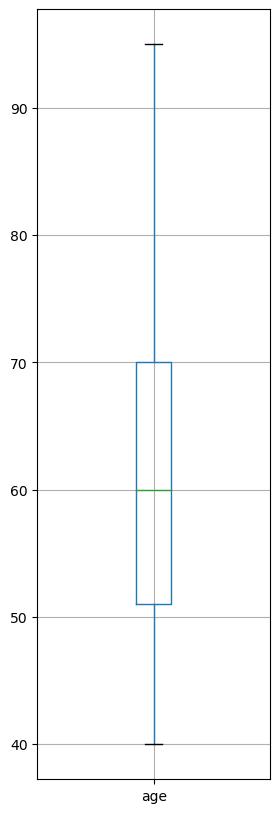

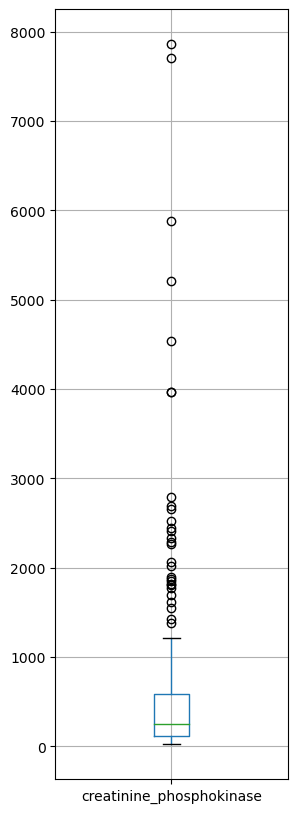

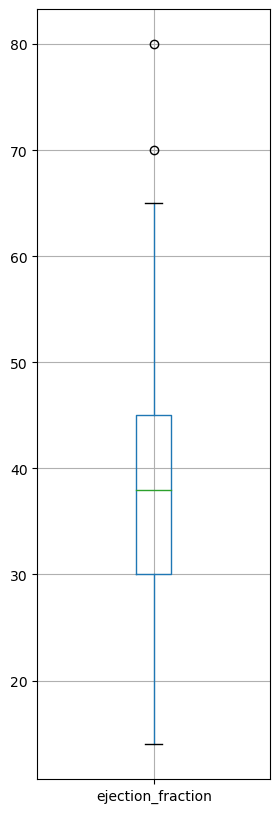

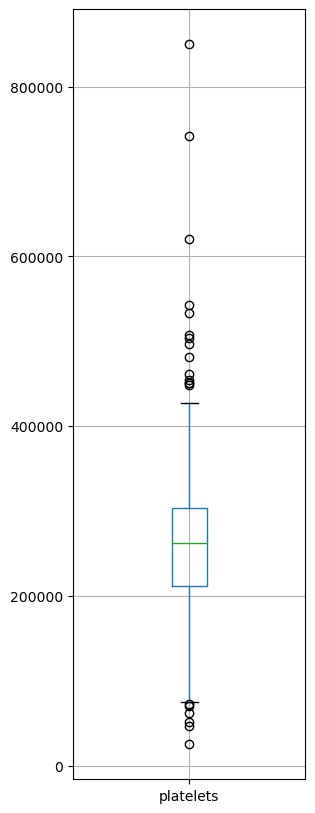

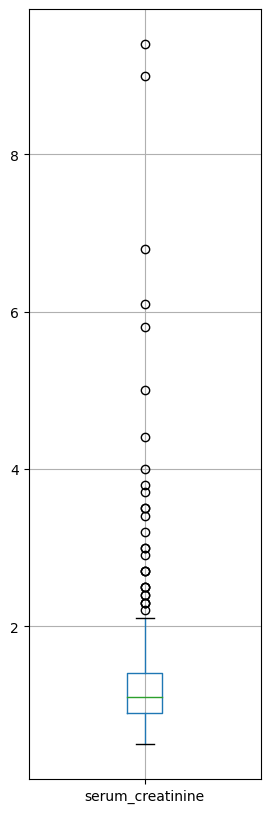

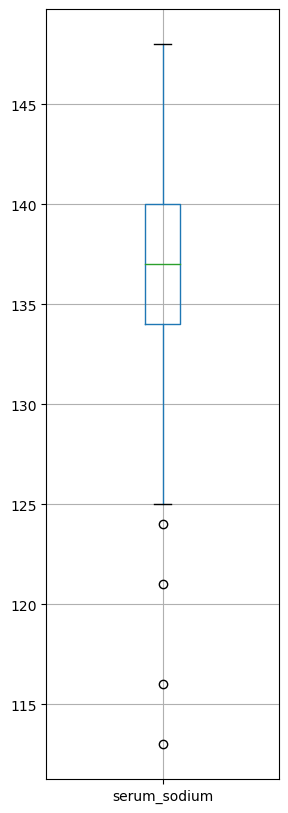

In [392]:
df.boxplot(['age'], figsize=(3,10))
plt.show()
df.boxplot(['creatinine_phosphokinase'], figsize=(3,10))
plt.show()
df.boxplot(['ejection_fraction'], figsize=(3,10))
plt.show()
df.boxplot(['platelets'], figsize=(3,10))
plt.show()
df.boxplot(['serum_creatinine'], figsize=(3,10))
plt.show()
df.boxplot(['serum_sodium'], figsize=(3,10))
plt.show()

#### Missing values

In [393]:
# Missing values
print(df.isnull().sum())

age                         4
anaemia                     1
creatinine_phosphokinase    2
diabetes                    2
ejection_fraction           2
high_blood_pressure         2
platelets                   3
serum_creatinine            2
serum_sodium                1
sex                         5
smoking                     0
DEATH_EVENT                 0
dtype: int64


In [394]:
# getting all NaN values in the columns as missing values 
frames = [ 
    df[df['age'].isna()],
    df[df['anaemia'].isna()],
    df[df['creatinine_phosphokinase'].isna()],
    df[df['diabetes'].isna()],
    df[df['ejection_fraction'].isna()],
    df[df['high_blood_pressure'].isna()],
    df[df['platelets'].isna()],
    df[df['serum_creatinine'].isna()],
    df[df['serum_sodium'].isna()],
    df[df['sex'].isna()],
    df[df['smoking'].isna()],
    df[df['DEATH_EVENT'].isna()]
]

df_missing_values = pd.concat(frames, ignore_index=False)
df_missing_values.sort_index()
df_missing_values

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1
17,NaN,No,582.0,No,14.0,0.0,166000.00,0.8,127.0,Female,No,1
295,NaN,No,1820.0,No,38.0,0.0,NaN,1.2,139.0,Male,No,0
296,NaN,No,2060.0,Yes,60.0,0.0,742000.00,0.8,138.0,Male,No,0
294,62.0,NaN,61.0,Yes,38.0,1.0,155000.00,1.1,143.0,Female,Yes,0
253,70.0,No,NaN,Yes,35.0,1.0,236000.00,1.2,132.0,Male,No,0
298,50.0,No,NaN,No,45.0,0.0,395000.00,1.6,136.0,Female,Yes,0
276,70.0,No,618.0,NaN,35.0,0.0,327000.00,1.1,142.0,Male,No,0
281,70.0,No,582.0,NaN,NaN,0.0,51000.00,2.7,136.0,Female,Yes,0
254,53.0,Yes,446.0,No,NaN,1.0,263358.03,1.0,139.0,Female,No,0


In [395]:
# TODO: Preprocessing Dataset.

# looking for outliers in dataset
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,295.000000,297.000000,297.000000,297.000000,296.000000,297.000000,298.000000,299.00000
mean,60.946895,584.801347,38.003367,0.353535,263387.475405,1.397542,136.620805,0.32107
std,11.896148,972.874154,11.805432,0.478874,98295.456485,1.036956,4.419177,0.46767
min,40.000000,23.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.00000
25%,51.000000,118.000000,30.000000,0.000000,211750.000000,0.900000,134.000000,0.00000
50%,60.000000,250.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.00000
75%,70.000000,582.000000,45.000000,1.000000,304000.000000,1.400000,140.000000,1.00000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.00000


In [396]:
print(f'-'*60)
print(f'Number of rows with missing values in any columns: {len(df_missing_values)} ')
print(f'-'*60)

------------------------------------------------------------
Number of rows with missing values in any columns: 24 
------------------------------------------------------------


## Preparation of dataset

1. We dropped the rows with missing values;
2. We didn't remove the rows with outliers;
3. We changed the categorical variables into numeric values.

In [397]:
# dropping missing values
df.dropna(inplace=True)
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,60.979545,581.960289,38.054152,0.364621,263354.998881,1.406751,136.646209,0.335740
std,12.079913,988.979954,11.924610,0.482195,94571.007935,1.063068,4.217514,0.473103
min,40.000000,23.000000,15.000000,0.000000,25100.000000,0.500000,113.000000,0.000000
25%,50.000000,115.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000
50%,60.000000,248.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.000000
75%,70.000000,582.000000,45.000000,1.000000,303000.000000,1.400000,140.000000,1.000000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,146.000000,1.000000


In [398]:
# Replacing categorical variables
# anaemia: no -> 0, yes -> 1
# diabetes: no -> 0, yes -> 1
# sex: male -> 0, female -> 1
# smoking: no -> 0, yes -> 1

df.replace({'No' : 0, 'Yes' : 1}, inplace=True)
df.replace({'Male' : 0, 'Female' : 1}, inplace=True)
df = df.replace({'high_blood_pressure' : {1.0 : 1, 0.0 : 0}}).astype({'high_blood_pressure' :'int64'})
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,1
5,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0,0
289,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0,0
290,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0,0
293,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1,0


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [399]:
# TODO: Split data and normalize. You can use scikit-learn libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [400]:
df_lin_reg = df.drop(columns=['DEATH_EVENT'])
df_lin_reg.reset_index(inplace=True)
df_lin_reg.drop(columns=['index'], inplace=True)
df_lin_reg

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0
4,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
272,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0
273,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0
274,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0
275,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1


### Splitting data into training, validation and test sets

In [401]:
X = df_lin_reg.drop(columns=['serum_creatinine'])
y = df_lin_reg[['serum_creatinine']]

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.66, test_size=0.33, random_state=42)

print(f'-'*70)
print()
print(f'Statistic of splitted dataset:')
print()
print(f'Training size   : {len(X_train)} - {(len(X_train) / len(X))*100:.2f}%')
print(f'Validation size : {len(X_valid)}  - {(len(X_valid) / len(X))*100:.2f}%')
print(f'Testing size    : {len(X_test)}  - {(len(X_test) / len(X))*100:.2f}%')
print(f'Dataset size    : {len(X)} - 100%')

----------------------------------------------------------------------

Statistic of splitted dataset:

Training size   : 193 - 69.68%
Validation size : 55  - 19.86%
Testing size    : 28  - 10.11%
Dataset size    : 277 - 100%


### Feature scaling on training, validation and test sets

In [403]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.fit_transform(X_valid)
scaled_X_test = scaler.fit_transform(X_test)

scaled_y_train = scaler.fit_transform(y_train)
scaled_y_valid = scaler.fit_transform(y_valid)
scaled_y_test = scaler.fit_transform(y_test)

### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

___
1.1 Do we need all the features to predict the target value?

According by the mutual_info_regression function (skitlearn), we can observe the mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The features (variable) are **age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_sodium, sex, and smoking**. The target value is **serum_creatinine**. 



In [404]:
from sklearn.feature_selection import mutual_info_regression

# TODO: Feature selection.

mutual_info_reg = mutual_info_regression(X, y, random_state=42)
print(mutual_info_reg)

mutual_info_reg = pd.Series(mutual_info_reg)
mutual_info_reg.index = X.columns
mir = mutual_info_reg.sort_values(ascending=False)
print(mir)

[0.06538653 0.0002344  0.         0.         0.02488475 0.03036783
 0.02738513 0.15965753 0.02715119 0.        ]
serum_sodium                0.159658
age                         0.065387
high_blood_pressure         0.030368
platelets                   0.027385
sex                         0.027151
ejection_fraction           0.024885
anaemia                     0.000234
creatinine_phosphokinase    0.000000
diabetes                    0.000000
smoking                     0.000000
dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


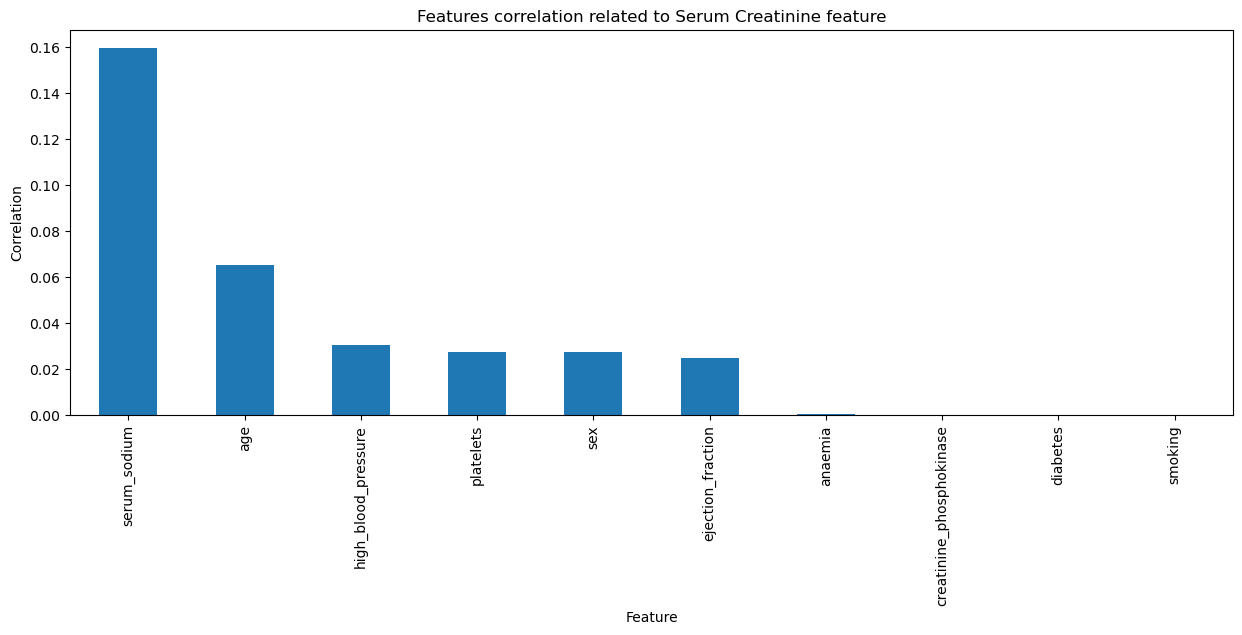

In [405]:
mutual_info_reg.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Features correlation related to Serum Creatinine feature')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

In [406]:
df_lin_reg.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
age,1.000000,0.081807,-0.085623,-0.117457,0.071869,0.078830,-0.028717,0.151729,-0.058695,0.082232,0.022912
anaemia,0.081807,1.000000,-0.192999,-0.021808,0.045309,0.026955,-0.041323,0.044833,0.092901,-0.093077,-0.112989
creatinine_phosphokinase,-0.085623,-0.192999,1.000000,-0.020895,-0.056450,-0.061982,-0.002773,-0.013164,0.058633,0.101439,0.019252
diabetes,-0.117457,-0.021808,-0.020895,1.000000,0.010324,-0.014177,0.077854,-0.053828,-0.073639,-0.158039,-0.162138
ejection_fraction,0.071869,0.045309,-0.056450,0.010324,1.000000,0.008526,0.033938,-0.001055,0.134526,-0.162823,-0.078276
high_blood_pressure,0.078830,0.026955,-0.061982,-0.014177,0.008526,1.000000,0.067348,-0.006021,0.010214,-0.113995,-0.061111
platelets,-0.028717,-0.041323,-0.002773,0.077854,0.033938,0.067348,1.000000,-0.032682,0.072478,-0.091105,0.042810
serum_creatinine,0.151729,0.044833,-0.013164,-0.053828,-0.001055,-0.006021,-0.032682,1.000000,-0.180596,0.009474,-0.035213
serum_sodium,-0.058695,0.092901,0.058633,-0.073639,0.134526,0.010214,0.072478,-0.180596,1.000000,-0.053214,-0.011277
sex,0.082232,-0.093077,0.101439,-0.158039,-0.162823,-0.113995,-0.091105,0.009474,-0.053214,1.000000,0.448834


___
1.2 What happens if we drop the low correlation features?

The features with low correlation has low impact in the linear regression due to low contribution in the linear regression. But if we dropped them, maybe the regression coefficients of the remaining features may change leading us to a different interpretation of the coefficients.

> What are the conclusions? (1-2 paragraphs)


**TODO**

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [407]:
# TODO: MSE Loss. You cannot use scikit-learn!!

# Compute Mean Squared Error (MSE) between the known (ground-truth) and predicted values.
def MSE(y_ground_truth, y_predict):
  # calculating MSE
  mse = np.mean((y_ground_truth - y_predict) ** 2)

  # returning MSE between known y and predicted y
  return mse 

In [408]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
class AnalyticalLinearRegression():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    # calculating y predict 
    y_predict = np.dot(X, self.weights)

    # returning y_predict 
    return y_predict

  def fit(self, X, y):

    # calculating the Roose-Penrose pseudoinverse of X
    X_pseudoinverse = np.linalg.pinv(X)

    # calculating y predicted 
    self.weights = np.matmul(X_pseudoinverse, y)
 

# creating Linear Regression instance 
model = AnalyticalLinearRegression()

# fitting model with training data 
model.fit(scaled_X_train, scaled_y_train)

# predicting model with test data 
y_predict = model.predict(scaled_X_test)

# calculating MSE of model 
mse_analytical_linear_regression_test = MSE(scaled_y_test, y_predict)
print(f'MSE of analytical LR: {mse_analytical_linear_regression_test}')

MSE of analytical LR: 0.0758881938380551


In [409]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
# Inspirations:
#   https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
#   https://stats.stackexchange.com/questions/432683/how-to-plot-cost-function-against-iterations

class GradientDescentLinearRegression():

  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None
    self.costs            = None

  # predicting values using the model 
  def predict(self, X):
    # calculating y predict 
    y_predict = np.dot(X, self.weights) + self.bias

    # returning y_predict 
    return y_predict

  #  fitting the model 
  def fit(self, X, y, learning_rate, epochs):

    # setting the initial parameters 
    number_of_samples, number_of_features = X.shape
    self.weights = np.zeros((number_of_features, 1))
    self.learning_rate = learning_rate
    self.bias = 0
    self.costs = []
 
    # calculating the gradient descent 
    for i in range(epochs):
        # calculating y predict 
        y_predict = np.dot(X, self.weights) + self.bias

        # calculating cost using MSE
        cost = MSE(y, y_predict)
        self.costs.append(cost)

        # calculating the gradients
        delta_w = (-2 / number_of_samples) * sum(X * (y - y_predict) )

        # calculating the loss
        delta_bias = (-2 / number_of_samples) * sum(y - y_predict)

        # updating weights and bias 
        self.weights = self.weights - self.learning_rate * delta_w.reshape(number_of_features, 1)
        self.bias = self.bias - self.learning_rate * delta_bias

# creating Linear Regression instance 
GDLR_model = GradientDescentLinearRegression()

# fitting model with training data
GDLR_model.fit(scaled_X_train, scaled_y_train, 0.0001, 1000)

# predicting model with test data 
y_predict = GDLR_model.predict(scaled_X_test)

# calculating MSE of model 
mse_gradient_descent_linear_regression_test = MSE(scaled_y_test, y_predict)
print(f'MSE of Gradient Descent LR: {mse_gradient_descent_linear_regression_test}')

MSE of Gradient Descent LR: 0.10599470905202772


In [410]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def execute_linear_reg_sklearn (X_train_sklearn, y_train_sklearn, X_test_sklearn, y_test_sklearn, learning_rate_sklearn):

    # Training the model

    # creating SGDRegressor instance 
    sgdr = SGDRegressor(learning_rate='constant', eta0=learning_rate_sklearn)

    # fitting the model on train data 
    sgdr.fit(X_train_sklearn, y_train_sklearn)
    
    # Predicting result 
    y_predict_sklearn = sgdr.predict(X_test_sklearn)

    # calculate the mean squared error 
    mse_test_sklearn = mean_squared_error(y_test_sklearn, y_predict_sklearn)
            
    # returning results
    return sgdr.coef_, y_predict_sklearn, mse_test_sklearn 


# calculating linear regression with sklearn functions
weights, y_predict, mse_test_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, 0.01)

# printing results 
print(f'weights: {weights}')
print()
print(f'y_predict: {y_predict}')
print()
print(f'mse sklearn of function  : {mse_test_sklearn}')
print()

weights: [ 0.04738191  0.01494737  0.0034709  -0.00092713  0.00926185 -0.00680689
  0.02089318  0.00270358  0.01932276  0.0009502 ]

y_predict: [0.10178463 0.10572743 0.1333415  0.13383245 0.12039045 0.16782573
 0.13886214 0.16358514 0.1384477  0.09356018 0.1457192  0.1146521
 0.10727014 0.14190051 0.12114555 0.12255045 0.11341706 0.10130515
 0.11594146 0.13402725 0.13358951 0.11439143 0.1156429  0.15703338
 0.11573171 0.15166023 0.13978633 0.13030252]

mse sklearn of function  : 0.07959025177975033



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [411]:
print(f'Comparision of MSE:')
print(f'MSE analytical LR : {mse_analytical_linear_regression_test}')
print(f'MSE sklearn LR ...: {mse_test_sklearn}')
print()
print(f'Difference Sklearn and Analytical: {mse_test_sklearn - mse_analytical_linear_regression_test}')

Comparision of MSE:
MSE analytical LR : 0.0758881938380551
MSE sklearn LR ...: 0.07959025177975033

Difference Sklearn and Analytical: 0.0037020579416952304


> What are the conclusions? (1-2 paragraphs)

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

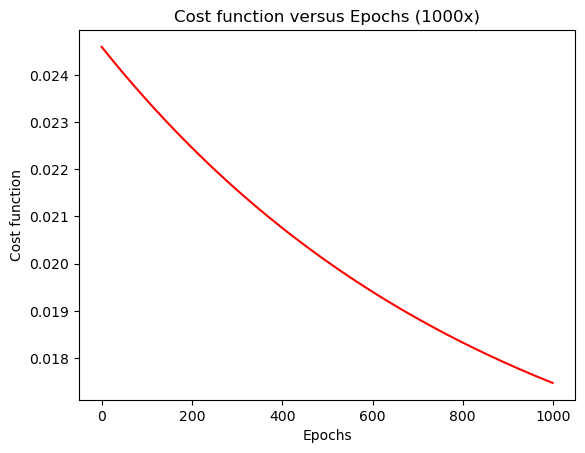

In [412]:
# TODO: Plot the cost function vs. number of iterations in the training set.

# creating Linear Regression instance 
GDLR_model = GradientDescentLinearRegression()

# setting epochs number
epochs = 1000

# fitting model with training data
GDLR_model.fit(scaled_X_train, scaled_y_train, 0.0001, epochs)

# plotting cost function versus epochs 
plt.plot(list(range(epochs)), GDLR_model.costs, '-r')
title = 'Cost function versus Epochs (' + str(epochs) + 'x)'
plt.title(title)
plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.show()


> What are the conclusions? (1-2 paragraphs)

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [413]:
# TODO: Different learning rates. You can use scikit-learn libraries.

# calculating linear regression with sklearn functions
learning_rate = 0.000001
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.00001
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.0001
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.001
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.01
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.05
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.10
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.15
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.30
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.35
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.40
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.45
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.50
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.55
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.70
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 0.75
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 1.0
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 2.0
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate = 4.0
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')



learning_rate: 0.000001 - mse: 0.12491859825737393
learning_rate: 0.000010 - mse: 0.1235057118873042
learning_rate: 0.000100 - mse: 0.11224691438011183
learning_rate: 0.001000 - mse: 0.08798667145328569
learning_rate: 0.010000 - mse: 0.08287526813067643
learning_rate: 0.050000 - mse: 0.0776936622948551
learning_rate: 0.100000 - mse: 0.0806193929006952
learning_rate: 0.150000 - mse: 0.07883334162886967
learning_rate: 0.300000 - mse: 0.06398875157164641
learning_rate: 0.350000 - mse: 0.2782504309874477
learning_rate: 0.400000 - mse: 0.08747013134511568
learning_rate: 0.450000 - mse: 0.1204269798666997
learning_rate: 0.500000 - mse: 44719880338990.984
learning_rate: 0.550000 - mse: 2.2027115295793296e+23
learning_rate: 0.700000 - mse: 4.493992959941066e+23
learning_rate: 0.750000 - mse: 3.08005062551603e+24
learning_rate: 1.000000 - mse: 2.48768760692501e+24
learning_rate: 2.000000 - mse: 6.378841361968445e+25
learning_rate: 4.000000 - mse: 3.8651012454198616e+25


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

> What are the conclusions? (1-2 paragraphs)


Conclusir açlsk açlksçlaks   

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [414]:
# TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures

# getting number of samples and features of training data 
number_of_samples, number_of_features = scaled_X_train.shape
print(f'number_of_samples : {number_of_samples}')
print(f'number_of_features: {number_of_features}')

print()
print(f'X_train.shape: {scaled_X_train.shape}')
print(f'y_train.shape: {scaled_y_train.shape}')

# getting instance of Polynomialfeatures class
poly = PolynomialFeatures(degree=2)

# fitting model with training data 
scaled_X_train_polynomial = poly.fit_transform(scaled_X_train)
scaled_X_valid_polynomial = poly.fit_transform(scaled_X_valid)
scaled_X_test_polynomial  = poly.fit_transform(scaled_X_test)
print()
print(f'poly_result.shape: {scaled_X_train_polynomial.shape}')
print(f'poly_result: {scaled_X_train_polynomial}')

print()
print(f'X_train.shape: {scaled_X_train.shape}')
print(f'y_train.shape: {scaled_y_train.shape}')

print()
print(f'get_feature_names_out {poly.get_feature_names_out()}')

print()
print(f'get_params {poly.get_params(deep=True)}')

number_of_samples : 193
number_of_features: 10

X_train.shape: (193, 10)
y_train.shape: (193, 1)

poly_result.shape: (193, 66)
poly_result: [[1.         0.54545455 0.         ... 1.         1.         1.        ]
 [1.         0.54545455 0.         ... 1.         0.         0.        ]
 [1.         0.18181818 0.         ... 1.         1.         1.        ]
 ...
 [1.         0.41818182 0.         ... 1.         1.         1.        ]
 [1.         0.27272727 1.         ... 1.         0.         0.        ]
 [1.         0.36363636 0.         ... 0.         0.         0.        ]]

X_train.shape: (193, 10)
y_train.shape: (193, 1)

get_feature_names_out ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x0^2' 'x0 x1'
 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8' 'x0 x9' 'x1^2'
 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x2^2'
 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x3^2' 'x3 x4'
 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x5' '

In [415]:
# Original scaled_X_train
learning_rate = 0.35
weights, y_predict, mse_sklearn = execute_linear_reg_sklearn(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, learning_rate)
print(f'Original   - learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

# Polynomial scaled_X_train
learning_rate = 0.35
weights_poly, y_predict_poly, mse_sklearn_poly = execute_linear_reg_sklearn(scaled_X_train_polynomial, scaled_y_train, scaled_X_test_polynomial, scaled_y_test, learning_rate)
print(f'Polynomial - learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')



Original   - learning_rate: 0.350000 - mse: 0.10382787645021918
Polynomial - learning_rate: 0.350000 - mse: 0.10382787645021918


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [416]:
# TODO: Plot the true label and the predict label

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [417]:
from sklearn.feature_selection import mutual_info_classif

# TODO: Feature selection

> What are the conclusions? (1-2 paragraphs)

2. (2 points) Perform Multinomial Logistic Regression.

In [418]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)


3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [419]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.

In [420]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.

> What are the conclusions? (1-2 paragraphs)

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [421]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**